Crime Prizers ML Classification

In [26]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import datetime
from scipy import stats
import seaborn as sns
import re

In [2]:
#Loading crime data along with preprocessing(similar to Jurat, to maintain consistency)
crimes_2012 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', sep=',', error_bad_lines=False)
crimes_2012.drop_duplicates(subset=['ID', 'Case Number', 'Date'], inplace=True)
crimes_2012.drop(['Unnamed: 0','Case Number','IUCR','FBI Code','Updated On',
                  'X Coordinate','Y Coordinate'], inplace = True, axis = 1)
crimes_2012 = crimes_2012.dropna(axis = 0, how = 'any')

## date conversion
crimes_2012.Date = pd.to_datetime(crimes_2012.Date, format = '%m/%d/%Y %I:%M:%S %p')
crimes_2012['Primary Type'] = pd.Categorical(crimes_2012['Primary Type'])
crimes_2012['Description'] = pd.Categorical(crimes_2012['Description'])
crimes_2012['Location Description'] = pd.Categorical(crimes_2012['Location Description'])
crimes_2012['Primary Type']=crimes_2012['Primary Type'].apply(lambda x: re.sub(' ', '_', str(x)).lower())

#Associating community area name to Crime data


In [3]:
area_names = """
01	Rogers Park	
40	Washington Park
02	West Ridge	
41	Hyde Park
03	Uptown	
42	Woodlawn
04	Lincoln Square	
43	South Shore
05	North Center	
44	Chatham
06	Lakeview	
45	Avalon Park
07	Lincoln Park	
46	South Chicago
08	Near North Side	
47	Burnside
09	Edison Park	
48	Calumet Heights
10	Norwood Park	
49	Roseland
11	Jefferson Park	
50	Pullman
12	Forest Glen	
51	South Deering
13	North Park	
52	East Side
14	Albany Park	
53	West Pullman
15	Portage Park	
54	Riverdale
16	Irving Park
55	Hegewisch
17	Dunning	
56	Garfield Ridge
18	Montclare	
57	Archer Heights
19	Belmont Cragin	
58	Brighton Park
20	Hermosa	
59	McKinley Park
21	Avondale	
60	Bridgeport
22	Logan Square	
61	New City
23	Humboldt Park	
62	West Elsdon
24	West Town	
63	Gage Park
25	Austin	
64	Clearing
26	West Garfield Park 	
65	West Lawn
27	East Garfield Park	
66	Chicago Lawn
28	Near West Side	
67	West Englewood
29	North Lawndale	
68	Englewood
30	South Lawndale	
69	Greater Grand Crossing
31	Lower West Side	
70	Ashburn
32	Loop	
71	Auburn Gresham
33	Near South Side	
72	Beverly
34	Armour Square	
73	Washington Heights
35	Douglas	
74	Mount Greenwood
36	Oakland	
75	Morgan Park
37	Fuller Park	
76	O'Hare
38	Grand Boulevard	
77	Edgewater
39	Kenwood
"""

In [27]:
neighborhood_Map = """
Cabrini–Green	Near North Side	
The Gold Coast	Near North Side	
Goose Island	Near North Side	
Magnificent Mile	Near North Side	
Old Town	Near North Side	
River North	Near North Side	
River West	Near North Side	
Streeterville	Near North Side	
Loop	Loop	
Near East Side	Loop	
South Loop	Loop	
West Loop Gate	Loop	
Dearborn Park	Near South Side	
Printer's Row	Near South Side	
South Loop	Near South Side	
Prairie Avenue Historic District	Near South Side	
Horner Park	North Center	
Roscoe Village	North Center	
Boystown	Lake View	
Lake View East	Lake View	
Graceland West	Lake View	
South East Ravenswood	Lake View	
Wrigleyville	Lake View	
Old Town Triangle	Lincoln Park
Park West	Lincoln Park	
Ranch Triangle	Lincoln Park	
Sheffield Neighbors	Lincoln Park	
Wrightwood Neighbors	Lincoln Park	
Belmont Gardens	Avondale	
Chicago's Polish Village	Avondale	
Kosciuszko Park	Avondale	
Belmont Gardens	Logan Square	
Bucktown	Logan Square	
Kosciuszko Park	Logan Square	
Palmer Square	Logan Square	
East Rogers Park	Rogers Park	
Arcadia Terrace	West Ridge	
Peterson Park	West Ridge	
West Rogers Park	West Ridge	
Buena Park	Uptown	
Argyle Street	Uptown	
Margate Park	Uptown	
Sheridan Park	Uptown	
Ravenswood	Lincoln Square	
Ravenswood Gardens	Lincoln Square	
Rockwell Crossing	Lincoln Square	
Edison Park	Edison Park	
Big Oaks	Norwood Park	
Old Norwood Park	Norwood Park	
Oriole Park	Norwood Park	
Union Ridge	Norwood Park	
Gladstone Park	Jefferson Park	
Edgebrook	Forest Glen
Old Edgebrook	Forest Glen	
South Edgebrook	Forest Glen	
Sauganash	Forest Glen	
Wildwood	Forest Glen	
Brynford Park	North Park	
Hollywood Park	North Park	
River's Edge	North Park	
Sauganash Woods	North Park	
Mayfair	Albany Park	
North Mayfair	Albany Park	
Ravenswood Manor	Albany Park	
Schorsch Forest View	O'Hare	
Andersonville	Edgewater	
Edgewater Beach	Edgewater	
Magnolia Glen	Edgewater	
Lakewood/Balmoral	Edgewater	
Belmont Central	Portage Park	
Władysławowo	Portage Park	
Six Corners	Portage Park	
Avondale Gardens	Irving Park	
Independence Park	Irving Park	
Kilbourn Park	Irving Park	
Little Cassubia	Irving Park	
Old Irving Park	Irving Park	
West Walker	Irving Park	
The Villa	Irving Park	
Belmont Heights	Dunning	
Belmont Terrace	Dunning	
Irving Woods	Dunning	
Schorsch Village	Dunning	
Montclare	Montclare	
Belmont Central	Belmont Cragin	
Hanson Park	Belmont Cragin
Belmont Gardens	Hermosa	
Kelvyn Park	Hermosa	
East Village	West Town	
Noble Square	West Town	
Polish Downtown	West Town	
Pulaski Park	West Town	
Smith Park	West Town	
Ukrainian Village	West Town	
Wicker Park	West Town	
Galewood	Austin	
The Island	Austin	
West Garfield Park	West Garfield Park	
Fifth City	East Garfield Park	
Greektown	Near West Side	
Little Italy	Near West Side	
Tri-Taylor	Near West Side	
Lawndale	North Lawndale	
Homan Square	North Lawndale	
Douglas Park	North Lawndale	
Little Village	South Lawndale	
Heart of Chicago	Lower West Side	
Heart of Italy	Lower West Side	
Pilsen	Lower West Side	
East Pilsen	Lower West Side	
Chinatown	Armour Square
Wentworth Gardens	Armour Square	
Bridgeport, Chicago	Armour Square	
Groveland Park	Douglas	
Lake Meadows	Douglas	
the Gap	Douglas	
Prairie Shores	Douglas	
South Commons	Douglas	
Oakland	Oakland	
Fuller Park	Fuller Park	
Bronzeville	Grand Boulevard	
Kenwood	Kenwood	
South Kenwood	Kenwood	
Washington Park	Washington Park	
East Hyde Park	Hyde Park	
Hyde Park	Hyde Park	
West Woodlawn	Woodlawn	
Jackson Park Highlands	South Shore	
Bridgeport	Bridgeport	
Grand Crossing	Greater Grand Crossing	
Parkway Gardens	Greater Grand Crossing	
Park Manor	Greater Grand Crossing	
LeClaire Courts	Garfield Ridge	
Sleepy Hollow	Garfield Ridge	
Vittum Park	Garfield Ridge	
Archer Heights	Archer Heights	
Brighton Park	Brighton Park	
McKinley Park 	McKinley Park	
Back of the Yards	New City	
Canaryville	New City	
West Elsdon	West Elsdon	
Gage Park	Gage Park	
Chrysler Village	Clearing
Ford City	West Lawn	
West Lawn	West Lawn	
Lithuanian Plaza	Chicago Lawn	
Marquette Park	Chicago Lawn	
West Englewood	West Englewood	
Englewood	Englewood	
East Chatham	Chatham	
West Chatham	Chatham	
West Chesterfield	Chatham	
Avalon Park	Avalon Park	
Marynook	Avalon Park	
Stony Island Park	Avalon Park	
The Bush	South Chicago	
Burnside	Burnside	
Pill Hill	Calumet Heights	
Fernwood	Roseland	
Rosemoor	Roseland	
Cottage Grove Heights	Pullman	
London Towne	Pullman	
Jeffrey Manor	South Deering	
Trumbull Park	South Deering	
Altgeld Gardens	Riverdale	
Eden Green	Riverdale	
Golden Gate	Riverdale	
East Side	East Side	
West Pullman	West Pullman	
Hegewisch	Hegewisch
Beverly View	Ashburn	
Mary Crest	Ashburn	
Parkview	Ashburn	
Scottsdale	Ashburn	
Wrightwood	Ashburn	
Auburn Gresham	Auburn Gresham	
Beverly	Beverly	
Brainerd	Washington Heights	
Longwood Manor	Washington Heights	
Princeton Park	Washington Heights	
Mount Greenwood Heights	Mount Greenwood	
Talley's Corner	Mount Greenwood	
Beverly Woods	Morgan Park	
Kennedy Park	Morgan Park	
West Morgan Park	Morgan Park	
"""

In [28]:
#neighborhood mapping with community area
code_pairs = [[float(p[0]), p[1]] for p in [pair.strip().split('\t') for pair in area_names.strip().split('\n')]]
area_name_dic = {float(k[0]):k[1] for k in code_pairs} # code -> community area
area_toCode_dic = {k[1] : float(k[0]) for k in code_pairs} # community area -> code

code_pairs_neighborhoods = [[p[0], p[1]] for p in [pair.strip().split('\t') for pair in neighborhood_Map.strip().split('\n')]]
neighborhood_name_dic = {k[0]:k[1] for k in code_pairs_neighborhoods} #neighborhood -> community area

In [29]:
#further processing of data
df =  crimes_2012.drop(['Latitude', 'Longitude', 'ID','Date'], axis=1)
df.columns = [str(re.sub(' ', '_', str(x))).lower() for x in df.columns]

### count each crime types over the years
crime_catg = df.groupby(['community_area','year','primary_type'])['primary_type'].count().unstack()
crime_catg = crime_catg[['theft','battery', 'criminal_damage', 'narcotics', 'assault', 'other_offense',
                        'burglary', 'deceptive_practice', 'motor_vehicle_theft', 'robbery']]
# crime_catg = crime_catg.dropna()
crime_catg.columns = crime_catg.columns.add_categories(['community_name'])
crime_catg.columns = pd.Index(list(crime_catg.columns))
crime_catg.reset_index(inplace=True)
crime_catg.dropna(inplace=True)
crime_catg['community_name'] = crime_catg['community_area'].map(area_name_dic)
crime_catg.head()

,community_area,year,theft,battery,criminal_damage,narcotics,assault,other_offense,burglary,deceptive_practice,motor_vehicle_theft,robbery,community_name
1,1.0,2012,1043.0,991.0,500.0,485.0,340.0,361.0,212.0,152.0,142.0,202.0,Rogers Park
2,1.0,2013,1004.0,866.0,534.0,362.0,303.0,318.0,187.0,166.0,91.0,136.0,Rogers Park
3,1.0,2014,811.0,776.0,376.0,278.0,257.0,248.0,174.0,215.0,115.0,113.0,Rogers Park
4,1.0,2015,845.0,666.0,441.0,205.0,234.0,239.0,165.0,207.0,113.0,106.0,Rogers Park
5,1.0,2016,851.0,724.0,388.0,79.0,227.0,209.0,175.0,204.0,111.0,154.0,Rogers Park


Load and preprocess real estate data

In [30]:
house_dict = pd.read_excel('real_eastate_data_main.xlsx').to_dict()
df = pd.DataFrame(house_dict).set_index('Region')
df.columns=df.columns.astype(str)
df.columns = pd.to_datetime(df.columns)
df = df.stack().reset_index()
df.columns = ['Region', 'year', 'price']
df = df[df['year'].dt.year.between(2012,2016)]
df['price_change'] = df.groupby('Region').price.apply(lambda x: x.diff().abs()/x)
house_df = df.groupby(['Region', df.year.dt.year])[['price_change']].mean()
house_df['price_status'] = house_df.groupby(level=0).apply(lambda x: (x>x.mean()).astype(int))
house_df.reset_index(inplace=True)

In [31]:
house_df.head()

,Region,year,price_change,price_status
0,"Chicago, IL",2012,0.082864,1
1,"Chicago, IL",2013,0.074208,1
2,"Chicago, IL",2014,0.063483,0
3,"Chicago, IL",2015,0.059584,0
4,"Chicago, IL",2016,0.051434,0


Concatinate Crime and housing data frames

In [32]:
house_df['neighborhood']=house_df['Region'].map(lambda x: x.lstrip('Chicago, IL - '))
crime_finalDF = pd.merge(crime_catg, house_df, left_on=['community_name', 'year'], right_on=['neighborhood', 'year'])
crime_finalDF.drop(['Region'], axis=1, inplace=True)
crime_finalDF.head()

,community_area,year,theft,battery,criminal_damage,narcotics,assault,other_offense,burglary,deceptive_practice,motor_vehicle_theft,robbery,community_name,price_change,price_status,neighborhood
0,1.0,2012,1043.0,991.0,500.0,485.0,340.0,361.0,212.0,152.0,142.0,202.0,Rogers Park,0.049765,1,Rogers Park
1,1.0,2013,1004.0,866.0,534.0,362.0,303.0,318.0,187.0,166.0,91.0,136.0,Rogers Park,0.046038,1,Rogers Park
2,1.0,2014,811.0,776.0,376.0,278.0,257.0,248.0,174.0,215.0,115.0,113.0,Rogers Park,0.044754,1,Rogers Park
3,1.0,2015,845.0,666.0,441.0,205.0,234.0,239.0,165.0,207.0,113.0,106.0,Rogers Park,0.032996,0,Rogers Park
4,1.0,2016,851.0,724.0,388.0,79.0,227.0,209.0,175.0,204.0,111.0,154.0,Rogers Park,0.043892,1,Rogers Park


In [ ]:
#Import various Classification/regression libraries.

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
import warnings

In [99]:
#defining features and labels.
X_features=crime_finalDF.iloc[:, 2:11,].values
y_label=crime_finalDF['price_status'].values

In [100]:
#splitting data into train and test
seed=np.random.seed(200)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.25, random_state = seed)

In [101]:
_RANDOM_STATE_V = 45

Starting with Dummy Classifier

In [60]:
model = DummyClassifier(strategy="stratified", random_state=_RANDOM_STATE_V).fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(pred, y_test))
print(classification_report(pred, y_test))

Accuracy:  0.5223880597014925
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        41
           1       0.38      0.38      0.38        26

   micro avg       0.52      0.52      0.52        67
   macro avg       0.50      0.50      0.50        67
weighted avg       0.52      0.52      0.52        67



#### Plotting ROC Curve:

Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality.

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

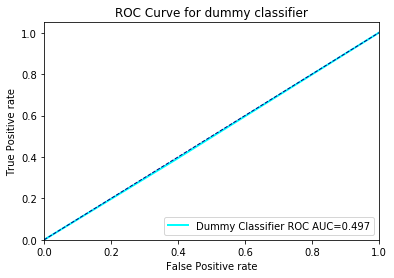

In [61]:
#predicting probabilities:
model_prediction_prob = model.predict_proba(X_test)[:, 1]
#getting true positives and false positives
fpr, tpr, _ = roc_curve(y_test.ravel(), model_prediction_prob.ravel())
roc_auc = roc_auc_score(y_test.ravel(), model_prediction_prob.ravel())
#plotting data
plt.figure()
plt.plot(fpr, tpr, color='cyan', lw=2,
         label='Dummy Classifier ROC AUC={0:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve for dummy classifier')
plt.show()

Decision Tree Classifier

Accuracy:  0.5671641791044776
              precision    recall  f1-score   support

           0       0.54      0.69      0.60        32
           1       0.62      0.46      0.52        35

   micro avg       0.57      0.57      0.57        67
   macro avg       0.58      0.57      0.56        67
weighted avg       0.58      0.57      0.56        67



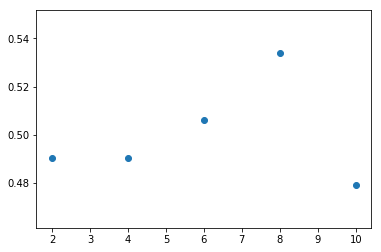

In [62]:
max_depth = [2,4,6,8,10]
Ecv_scores = []
for i in max_depth:
    model = DecisionTreeClassifier(max_depth = i, criterion = 'entropy', random_state = _RANDOM_STATE_V)
    model.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    Ecv_scores.append(1-np.mean(cv_scores))
plt.scatter(max_depth, Ecv_scores)
model = DecisionTreeClassifier(max_depth = 10, criterion = 'entropy', random_state = _RANDOM_STATE_V)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(pred, y_test))
print(classification_report(pred, y_test))

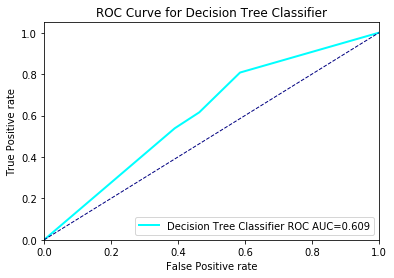

In [63]:
#predicting probabilities:
model_prediction_prob = model.predict_proba(X_test)[:, 1]
#getting true positives and false positives
fpr, tpr, _ = roc_curve(y_test.ravel(), model_prediction_prob.ravel())
roc_auc = roc_auc_score(y_test.ravel(), model_prediction_prob.ravel())
#plotting data
plt.figure()
plt.plot(fpr, tpr, color='cyan', lw=2,
         label='Decision Tree Classifier ROC AUC={0:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.show()

In [ ]:
Linear Perceptron

In [66]:
model = Perceptron(max_iter = 5000, early_stopping=True, validation_fraction=0.2, penalty='l2', random_state = _RANDOM_STATE_V)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(pred, y_test))
print(classification_report(pred, y_test))

C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Accuracy:  0.582089552238806
              precision    recall  f1-score   support

           0       0.49      0.74      0.59        27
           1       0.73      0.47      0.58        40

   micro avg       0.58      0.58      0.58        67
   macro avg       0.61      0.61      0.58        67
weighted avg       0.63      0.58      0.58        67



Logistic Regression Classifier

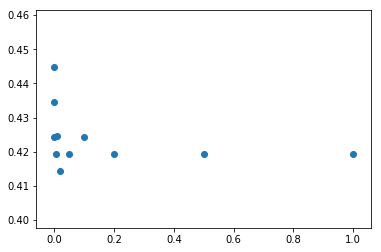

In [69]:
c = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]
Ecv_scores = [] 
for i in c:
    model = LogisticRegression(max_iter = 5000, solver='lbfgs', penalty='l2', C=i, random_state = _RANDOM_STATE_V)
    model.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    Ecv_scores.append(1-np.mean(cv_scores))
plt.scatter(c, Ecv_scores)

In [102]:
model = LogisticRegression(max_iter = 5000, solver='lbfgs', penalty='l2', C=Ecv_scores.index(min(Ecv_scores)), random_state = _RANDOM_STATE_V)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(pred, y_test))
print(classification_report(pred, y_test))

ZeroDivisionError: float division by zero

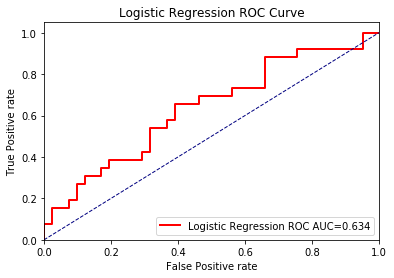

In [72]:
#predicting probabilities:
model_prediction_prob = model.predict_proba(X_test)[:, 1]
#getting true positives and false positives
fpr, tpr, _ = roc_curve(y_test.ravel(), model_prediction_prob.ravel())
roc_auc = roc_auc_score(y_test.ravel(), model_prediction_prob.ravel())
#plotting data
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2,
         label='Logistic Regression ROC AUC={0:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

#Working with Naive Bayes classifiers

In [73]:
#multinomial NB
model = MultinomialNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(pred, y_test))
print(classification_report(pred, y_test))

Accuracy:  0.44776119402985076
              precision    recall  f1-score   support

           0       0.34      0.58      0.43        24
           1       0.62      0.37      0.46        43

   micro avg       0.45      0.45      0.45        67
   macro avg       0.48      0.48      0.45        67
weighted avg       0.52      0.45      0.45        67



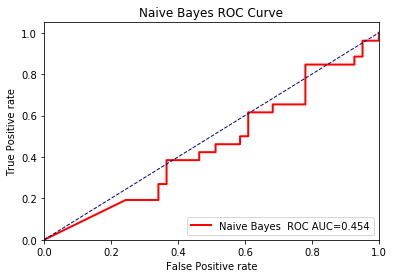

In [74]:
#predicting probabilities:
model_prediction_prob = model.predict_proba(X_test)[:, 1]
#getting true positives and false positives
fpr, tpr, _ = roc_curve(y_test.ravel(), model_prediction_prob.ravel())
roc_auc = roc_auc_score(y_test.ravel(), model_prediction_prob.ravel())
#plotting data
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2,
         label='Naive Bayes  ROC AUC={0:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Naive Bayes ROC Curve')
plt.show()

In [77]:
#Bernoulli NB
model = BernoulliNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(pred, y_test))
print(classification_report(pred, y_test))

Accuracy:  0.6119402985074627
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        67
           1       0.00      0.00      0.00         0

   micro avg       0.61      0.61      0.61        67
   macro avg       0.50      0.31      0.38        67
weighted avg       1.00      0.61      0.76        67



C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


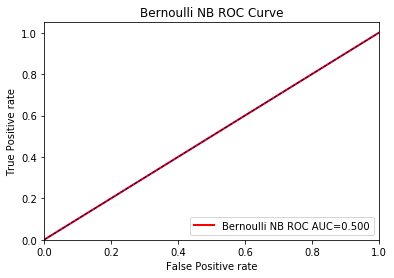

In [78]:
#predicting probabilities:
model_prediction_prob = model.predict_proba(X_test)[:, 1]
#getting true positives and false positives
fpr, tpr, _ = roc_curve(y_test.ravel(), model_prediction_prob.ravel())
roc_auc = roc_auc_score(y_test.ravel(), model_prediction_prob.ravel())
#plotting data
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2,
         label='Bernoulli NB ROC AUC={0:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Bernoulli NB ROC Curve')
plt.show()

In [82]:
#SGD Classifier
model = SGDClassifier(loss ='log', penalty ='l2', alpha=0.001, random_state= _RANDOM_STATE_V)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(pred, y_test))
print(classification_report(pred, y_test))

Accuracy:  0.4626865671641791
              precision    recall  f1-score   support

           0       0.37      0.60      0.45        25
           1       0.62      0.38      0.47        42

   micro avg       0.46      0.46      0.46        67
   macro avg       0.49      0.49      0.46        67
weighted avg       0.52      0.46      0.46        67



C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


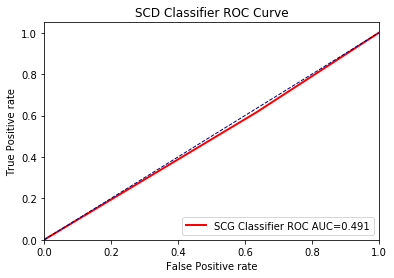

In [83]:
#predicting probabilities:
model_prediction_prob = model.predict_proba(X_test)[:, 1]
#getting true positives and false positives
fpr, tpr, _ = roc_curve(y_test.ravel(), model_prediction_prob.ravel())
roc_auc = roc_auc_score(y_test.ravel(), model_prediction_prob.ravel())
#plotting data
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2,
         label='SCG Classifier ROC AUC={0:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('SCD Classifier ROC Curve')
plt.show()

Accuracy:  0.6119402985074627
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        67
           1       0.00      0.00      0.00         0

   micro avg       0.61      0.61      0.61        67
   macro avg       0.50      0.31      0.38        67
weighted avg       1.00      0.61      0.76        67



C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


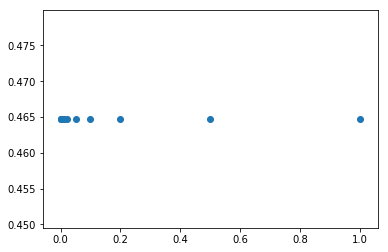

In [86]:
#Support Vector Machine Classifier
C = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]
Ecv_scores = []
for i in C:
    model = SVC(C=i, kernel='rbf', gamma='auto', probability=True)
    model.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    Ecv_scores.append(1-np.mean(cv_scores))
plt.scatter(C, Ecv_scores)
model = SVC(C=1.0, kernel='rbf', gamma='auto')
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(pred, y_test))
print(classification_report(pred, y_test))

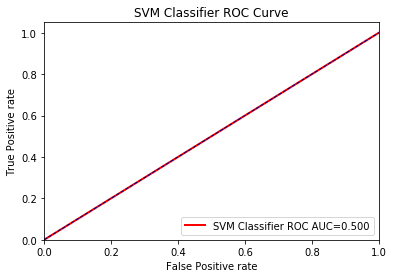

In [89]:
#predicting probabilities:
model_prediction_prob = model.predict(X_test)
#getting true positives and false positives
fpr, tpr, _ = roc_curve(y_test.ravel(), model_prediction_prob.ravel())
roc_auc = roc_auc_score(y_test.ravel(), model_prediction_prob.ravel())
#plotting data
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2,
         label='SVM Classifier ROC AUC={0:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('SVM Classifier ROC Curve')
plt.show()

#Random Forest Classifier

In [90]:
model = RandomForestClassifier(n_estimators=100, max_depth=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(pred, y_test))
print(classification_report(pred, y_test))

Accuracy:  0.4925373134328358
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        41
           1       0.35      0.35      0.35        26

   micro avg       0.49      0.49      0.49        67
   macro avg       0.47      0.47      0.47        67
weighted avg       0.49      0.49      0.49        67



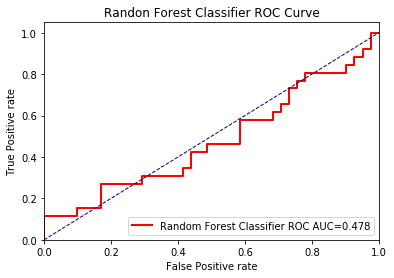

In [91]:
#predicting probabilities:
model_prediction_prob = model.predict_proba(X_test)[:, 1]
#getting true positives and false positives
fpr, tpr, _ = roc_curve(y_test.ravel(), model_prediction_prob.ravel())
roc_auc = roc_auc_score(y_test.ravel(), model_prediction_prob.ravel())
#plotting data
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2,
         label='Random Forest Classifier ROC AUC={0:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Randon Forest Classifier ROC Curve')
plt.show()

#Ada Boost Classifier

In [96]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(pred, y_test))
print(classification_report(pred, y_test))

Accuracy:  0.5671641791044776
              precision    recall  f1-score   support

           0       0.66      0.64      0.65        42
           1       0.42      0.44      0.43        25

   micro avg       0.57      0.57      0.57        67
   macro avg       0.54      0.54      0.54        67
weighted avg       0.57      0.57      0.57        67



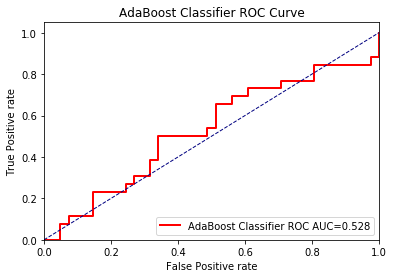

In [97]:
#predicting probabilities:
model_prediction_prob = model.predict_proba(X_test)[:, 1]
#getting true positives and false positives
fpr, tpr, _ = roc_curve(y_test.ravel(), model_prediction_prob.ravel())
roc_auc = roc_auc_score(y_test.ravel(), model_prediction_prob.ravel())
#plotting data
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2,
         label='AdaBoost Classifier ROC AUC={0:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AdaBoost Classifier ROC Curve')
plt.show()

### Final comment on result : From all the above ROC curves and accuracies, we can confirm that logistic Regression classifier performs better with given dataset